# Homework 3 Question 5

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Question 5 

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [5]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

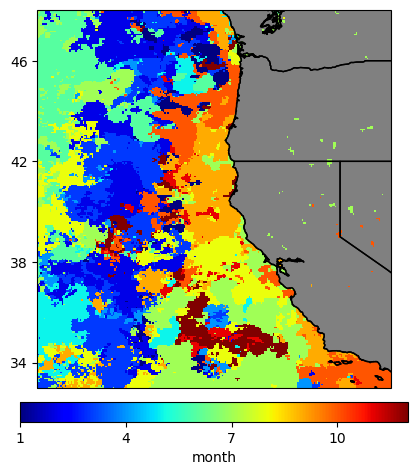

<Figure size 640x480 with 0 Axes>

In [6]:
# select the time range (2002-July 2016) and group by day of year. calculate the maximum.
ds1 = ds.analysed_sst.sel(time=slice("2002", "2016-07"))
sst = ds1.groupby(ds1.time.dt.dayofyear)
# select the time range(2002-2012) and group by day of year. calculate the mean.
ds2 = ds.analysed_sst.sel(time=slice("2002","2012"))
sst_mean =  ds2.groupby(ds2.time.dt.dayofyear).mean(skipna=True)

# calculate the anomalies
anomalies = sst-sst_mean

# find the maximum anomaly
anomalies_max = anomalies.idxmax(dim='time').dt.month

# plot the map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection=crs)
anoma_map = anomalies_max.plot(ax=ax, transform=crs,cmap='jet', add_colorbar=False)

ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.set_xlabel("")
ax.set_xticks(range(138,123,8))
ax.set_ylabel("")
ax.set_yticks(range(34,47,4))
# add colorbar
cbar = plt.colorbar(anoma_map, location='bottom', shrink=0.5, pad=0.03)
cbar.set_label('month')

cbar.set_ticks([1, 4, 7,10])
plt.show()
plt.savefig('outputs/Q05.png');